***1. Business Understanding***

This is a inventory classification project using ABC (based on sales value ) and XYZ (based on demand variability)  analysis combined with machine learning techniques to categorize inventory items based on value and demand variability.

This helps businesses optimize stock management and improve decision-making

***2. Data Understanding***

Loaded dataset from file.

Checked for missing values and data types.

Visualized distributions and patterns.

***3. Data Preparation***

Handled missing or incorrect data.

Encoded categorical variables

Created new features for ABC and XYZ classification:


Split the dataset into training and testing sets.

***4. Modeling***

Applied and compared multiple machine learning models:

DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,LogisticRegression etc


***5. Evaluation***

Evaluated models using:Accuracy,Precision, Recall, F1-score,Confusion Matrix

Identified the best-performing model,Decision Tree and Naive Bayes performed slightly better than the others.

**columns are:**
    
  Item_ID(A unique identifier for each item)

   Item_Name(name of item)

  Category(The category to which the item belongs, such as Grocery, Apparel, etc)

   Jan_Demand to Dec_Demand(Monthly sales.ie,the number of units sold for the items)

  Total_Annual_Units(gives how many units were sold in the entire year for that item)

   Price_Per_Unit( selling price of one unit of the item)

 Total_Sales_Value( total sales of the item for the year ie,Total_Annual_Units × Price_Per_Unit)

In [ ]:
#importing the essentional libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('abc_xyz_dataset.csv') #Loads the dataset into pandas DataFrame "df" from the csv file.
df.head() #Displays the first 5 rows of the dataset

,Item_ID,Item_Name,Category,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value
0,ITM_001,Surface Near,Grocery,4516,4069,4664,4653,4508,4125,4669,4210,4824,4497,4259,4782,53776,10,537760
1,ITM_002,Central Him,Grocery,4792,4964,4628,4660,4897,5015,4805,4686,4896,4536,4520,5054,57453,100,5745300
2,ITM_003,Win Everyone,Apparel,61,175,38,43,15,161,224,41,387,340,70,21,1576,2,3152
3,ITM_004,Task Save,Apparel,1145,1113,717,832,783,954,1047,894,994,978,1136,712,11305,2,22610
4,ITM_005,Hotel Teacher,Grocery,1494,2051,1400,1918,1669,1733,1695,1560,1679,1381,1591,1662,19833,10,198330


In [ ]:
#To understand the size of the dataset
df.shape #gives number of rows and columns

(1000, 18)

In [ ]:
df.isnull().sum() #checking for missing values

,0
Item_ID,0
Item_Name,0
Category,0
Jan_Demand,0
Feb_Demand,0
Mar_Demand,0
Apr_Demand,0
May_Demand,0
Jun_Demand,0
Jul_Demand,0


**there is no null values in the input data**

In [ ]:
df.duplicated().sum() #checking for the duplicate values in the input data

np.int64(0)

**there is no null values in the input data**

In [ ]:
df.describe() # to generate summary statistics (count, mean, std, min, max, %) for numerical columns.

,Jan_Demand,Feb_Demand,Mar_Demand,Apr_Demand,May_Demand,Jun_Demand,Jul_Demand,Aug_Demand,Sep_Demand,Oct_Demand,Nov_Demand,Dec_Demand,Total_Annual_Units,Price_Per_Unit,Total_Sales_Value
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1.000000e+03
mean,1418.515000,1418.394000,1421.23900,1409.242000,1411.762000,1412.853000,1410.558000,1403.721000,1411.109,1411.700000,1413.422000,1419.38100,16961.896000,57.358000,1.072288e+06
std,1489.352997,1488.076126,1496.49987,1489.280958,1488.620593,1490.568779,1497.772702,1484.283184,1482.689,1484.762652,1482.821287,1496.14098,17788.477345,155.110913,4.087477e+06
min,24.000000,7.000000,2.00000,8.000000,9.000000,15.000000,6.000000,2.000000,2.000,11.000000,9.000000,4.00000,581.000000,2.000000,1.228000e+03
25%,282.750000,279.000000,278.00000,278.000000,280.000000,277.750000,267.000000,283.000000,282.000,277.000000,275.750000,283.00000,3369.500000,2.000000,1.661900e+04
50%,539.500000,558.000000,591.50000,558.000000,541.500000,598.000000,555.000000,550.500000,547.000,591.000000,608.000000,562.00000,6737.500000,10.000000,7.283600e+04
75%,2478.500000,2529.250000,2515.75000,2427.000000,2461.250000,2451.500000,2547.500000,2407.750000,2472.750,2492.500000,2406.250000,2422.00000,29874.500000,50.000000,3.782425e+05
max,5276.000000,5171.000000,5271.00000,5186.000000,5384.000000,5462.000000,5504.000000,5219.000000,5240.000,5189.000000,5255.000000,5180.00000,59967.000000,1000.000000,5.946200e+07


In [ ]:
df.info() # to get the information of the input data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Item_ID             1000 non-null   object
 1   Item_Name           1000 non-null   object
 2   Category            1000 non-null   object
 3   Jan_Demand          1000 non-null   int64 
 4   Feb_Demand          1000 non-null   int64 
 5   Mar_Demand          1000 non-null   int64 
 6   Apr_Demand          1000 non-null   int64 
 7   May_Demand          1000 non-null   int64 
 8   Jun_Demand          1000 non-null   int64 
 9   Jul_Demand          1000 non-null   int64 
 10  Aug_Demand          1000 non-null   int64 
 11  Sep_Demand          1000 non-null   int64 
 12  Oct_Demand          1000 non-null   int64 
 13  Nov_Demand          1000 non-null   int64 
 14  Dec_Demand          1000 non-null   int64 
 15  Total_Annual_Units  1000 non-null   int64 
 16  Price_Per_Unit      1000 

***Chart ***

 **pie chart showing the distribution of product categories(Grocery,toys etc) in input data**

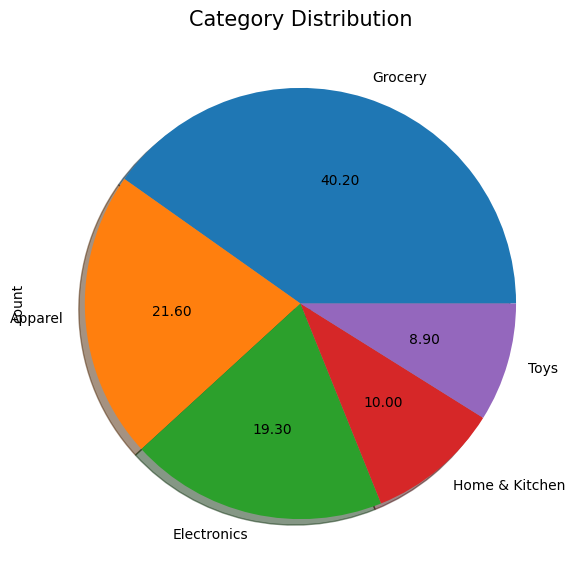

In [ ]:
# autopct='%.2f -> to Show percentage with 2 decimal places
# df['Category'].value_counts()-> Counts how many times each unique value appears in the Category column.
# .plot(kind='pie')-> Converts the value counts into a pie chart
df['Category'].value_counts().plot(kind='pie', autopct='%.2f', figsize=(9,7), shadow=True)
plt.title('Category Distribution', fontsize=15)
plt.show()

In [ ]:
df.columns # to get the name of the columns in the input data

Index(['Item_ID', 'Item_Name', 'Category', 'Jan_Demand', 'Feb_Demand',
       'Mar_Demand', 'Apr_Demand', 'May_Demand', 'Jun_Demand', 'Jul_Demand',
       'Aug_Demand', 'Sep_Demand', 'Oct_Demand', 'Nov_Demand', 'Dec_Demand',
       'Total_Annual_Units', 'Price_Per_Unit', 'Total_Sales_Value'],
      dtype='object')

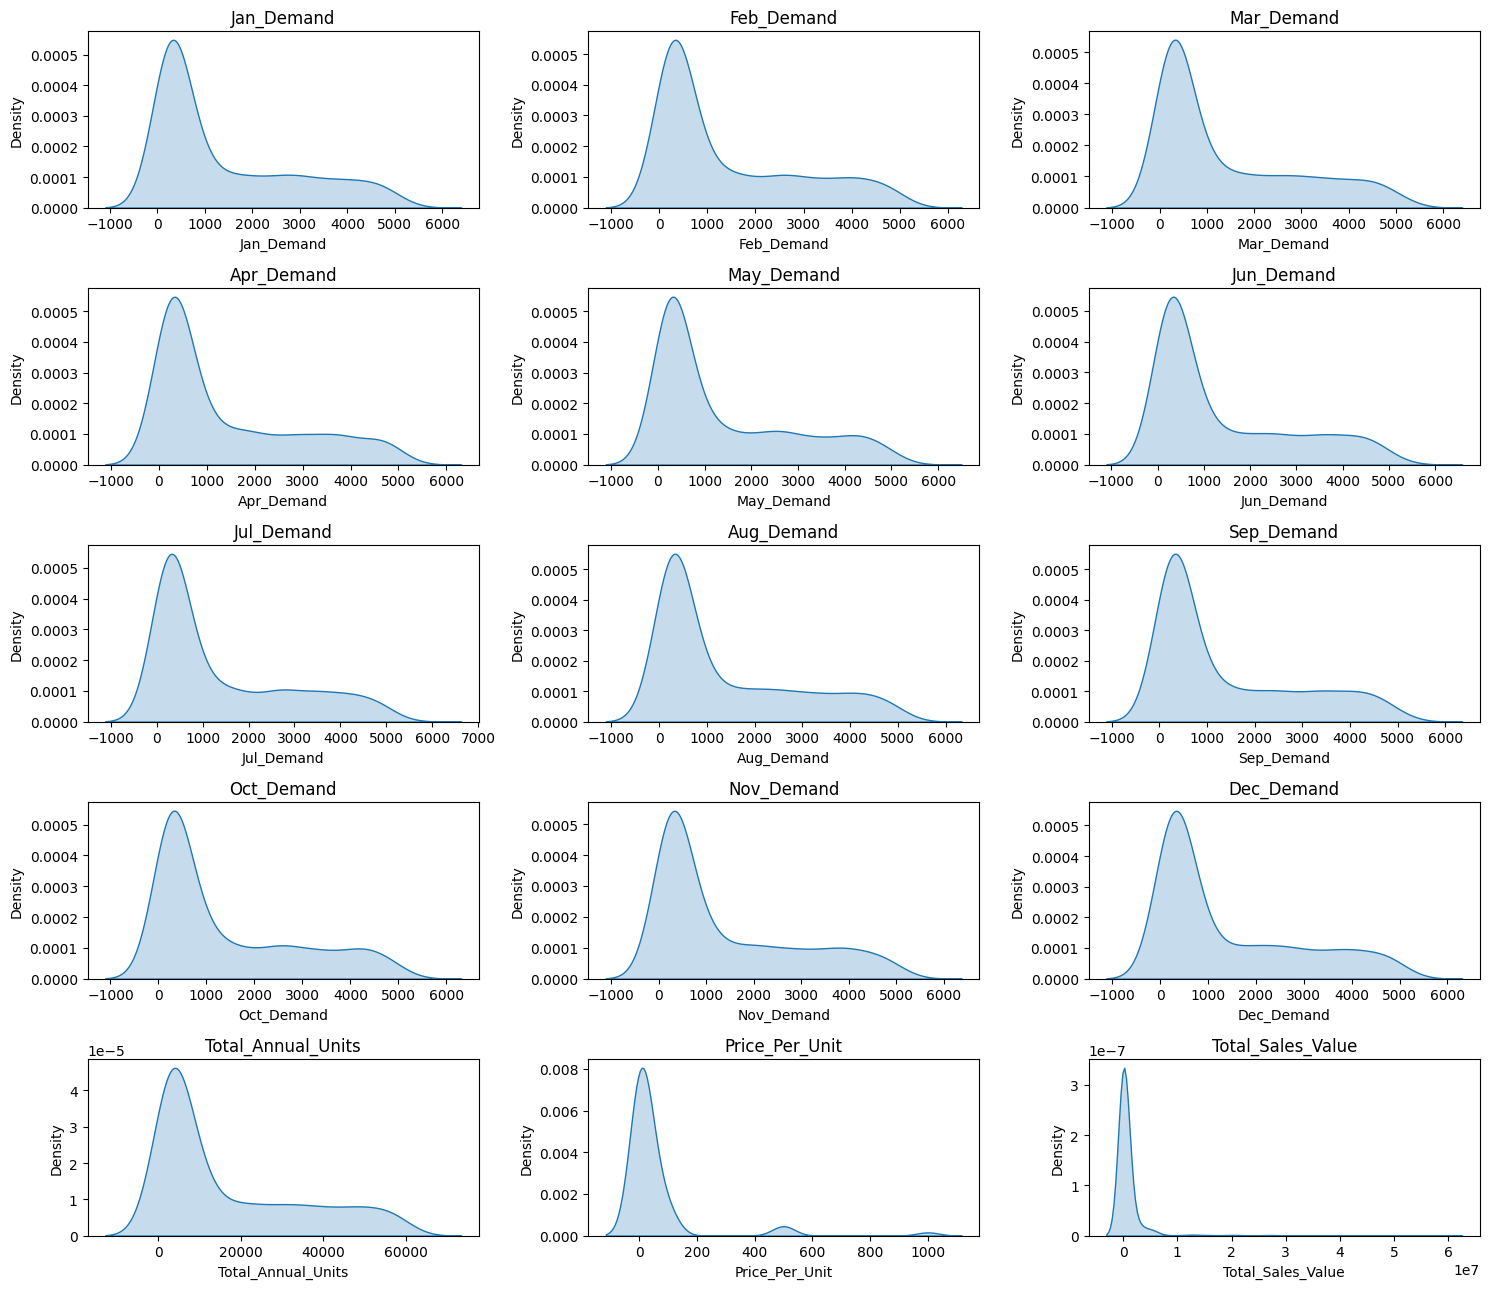

In [ ]:
plt.figure(figsize=(15,13))
for i, cols in enumerate(['Jan_Demand', 'Feb_Demand',
       'Mar_Demand', 'Apr_Demand', 'May_Demand', 'Jun_Demand', 'Jul_Demand',
       'Aug_Demand', 'Sep_Demand', 'Oct_Demand', 'Nov_Demand', 'Dec_Demand',
       'Total_Annual_Units', 'Price_Per_Unit', 'Total_Sales_Value']):
    plt.subplot(5, 3, i + 1) # 5 rows,3 columns, "i + 1" -> position of the current plot
    sns.kdeplot(x=cols, data=df, shade=True) # Kernel Density Estimation (KDE) tells how your data is distributed
    plt.title(cols)
    plt.tight_layout() #avoids label overlap
plt.show()

**KDE plots help  visualize data distribution, detect patterns, skewness, or outliers, and guide actions like inventory planning, pricing strategy, and outlier handling.**


**All monthly demand,Total_Sales_Value,Price_Per_Unit,Total_Annual_Units are right-skewed,so it proves that ABC/XYZ classification makes sense for this data.**



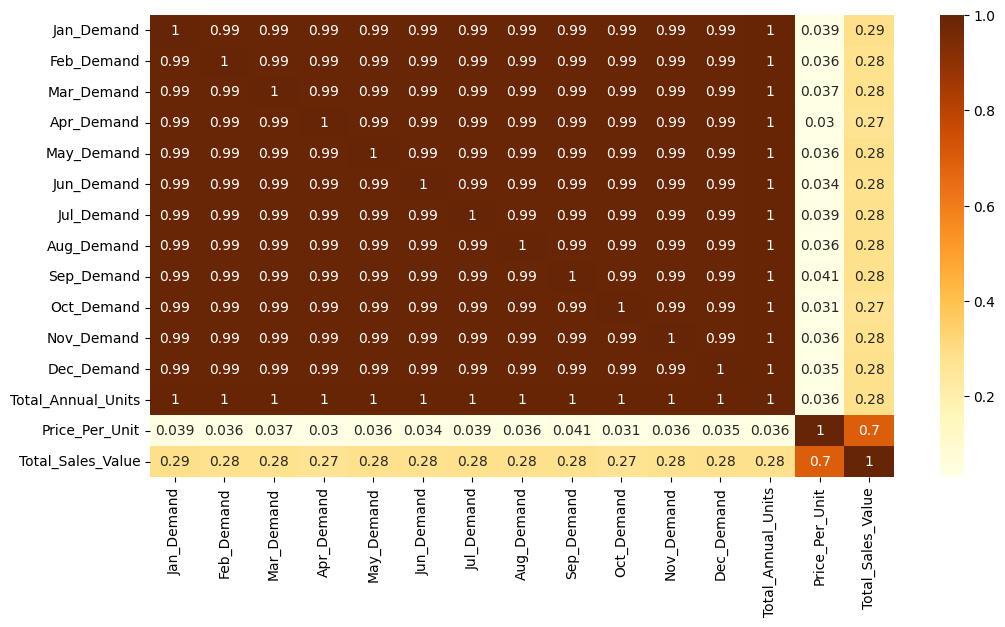

In [ ]:
#heatmap for checking correlation for numerical columns.
# annot=True -> Writes the correlation values inside the cells of the heatmap map
# cmap='YlOrBr' ->Yellow-Orange-Brown color , yellow is low correlation and brown is high
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlOrBr')
plt.show()

**correlation helps to understand relationships between monthly demand, sales value, price, and total units.**

**High correlation among all months**

**Price_Per_Unit has low correlation with all monthly demand**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, recall_score

**ABC classification focuses on sales value**

**pd.qcut()- 1st will sort into asenting order then ranks(gives lower values a lower rank) the data first, then splits it by quantiles**


**0 to 0.7 → Bottom 70% of products → Class C**

**0.7 to 0.9 → Next 20% → Class B**

**0.9 to 1.0 → Top 10% → Class A**


In [ ]:
df['ABC_Class'] = pd.qcut(df['Total_Sales_Value'], q=[0, 0.7, 0.9, 1.0], labels=['C', 'B', 'A']) #qcut-> to divide the data into 3 groups
le = LabelEncoder()
df['ABC_Class_Code'] = le.fit_transform(df['ABC_Class'])  #Converts the categorical ABC classes ('A', 'B', 'C') to numerical (0, 1, 2)


**XYZ classification is based on demand variability**

**CV tells you how unstable the monthly demand of a item is.**

In [ ]:
# Compute Coefficient of Variation (CV = Standard Deviation / mean)
monthly_demand_cols = ['Jan_Demand', 'Feb_Demand', 'Mar_Demand', 'Apr_Demand', 'May_Demand',
                       'Jun_Demand', 'Jul_Demand', 'Aug_Demand', 'Sep_Demand', 'Oct_Demand',
                       'Nov_Demand', 'Dec_Demand']

df['Mean_Demand'] = df[monthly_demand_cols].mean(axis=1)
df['Standard_Deviation'] = df[monthly_demand_cols].std(axis=1)
df['CV'] = df['Standard_Deviation'] / df['Mean_Demand']


In [ ]:
#Classify based on CV
def xyz_classify(cv):
    if cv <= 0.5:
        return 'X'  #  Very predictable demand.
    elif cv <= 1.0:
        return 'Y'  # Moderately variable
    else:
        return 'Z'  #  Highly unpredictable demand.

df['XYZ_Class'] = df['CV'].apply(xyz_classify)


In [ ]:
le_xyz = LabelEncoder()
df['XYZ_Class_Code'] = le_xyz.fit_transform(df['XYZ_Class'])  #Converts the categorical ABC classes ('X', 'Y', 'Z') to numerical (0, 1, 2)

In [ ]:
#Combine both ABC and XYZ classifications
df['ABC_XYZ'] = df['ABC_Class'].astype(str) + df['XYZ_Class'].astype(str)


In [ ]:
# Creates a list of feature and target variable
feature_cols = ['Jan_Demand', 'Feb_Demand', 'Mar_Demand', 'Apr_Demand', 'May_Demand',
                'Jun_Demand', 'Jul_Demand', 'Aug_Demand', 'Sep_Demand', 'Oct_Demand',
                'Nov_Demand', 'Dec_Demand', 'Price_Per_Unit', 'Total_Annual_Units']

X = df[feature_cols]

le_combo = LabelEncoder()
df['ABC_XYZ_Code'] = le_combo.fit_transform(df['ABC_XYZ'])
y = df['ABC_XYZ_Code']


In [ ]:
#Split the data into train/test
X_train,X_test, y_train,y_test = train_test_split(X,y , test_size=0.2)
#printing the size
print(f"X_train Shape: {X_train.shape}")
print(f"Y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (800, 14)
Y_train Shape: (800,)
X_test Shape: (200, 14)
y_test Shape: (200,)


In [ ]:
#Standardizing to normalize your data so that all features contribute equally , After scaling, mean = 0 and standard deviation = 1.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Data follows normal distribution and we are using SVM, Logistic Regression, KNN, Decision Tree, and Random Forest models so using StandardScaler is a good choice.**

In [ ]:
#create a dictionary which contain diff type of model
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}


Name: Logistic Regression
Accuracy: 83.00
Precision Score: 0.7315223180994993
Recall Score: 0.7270935960591133
F1 Score: 0.7281200410120271


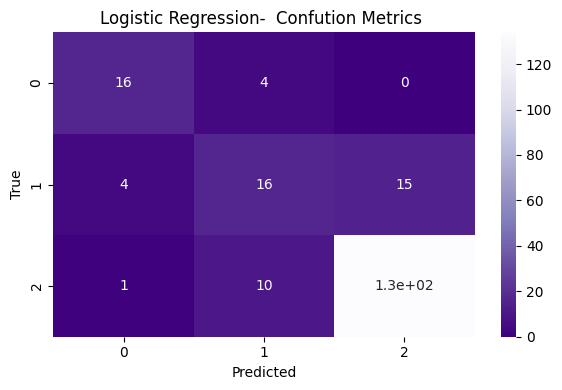


Name: Random Forest
Accuracy: 99.00
Precision Score: 0.981981981981982
Recall Score: 0.9666666666666667
F1 Score: 0.973196881091618


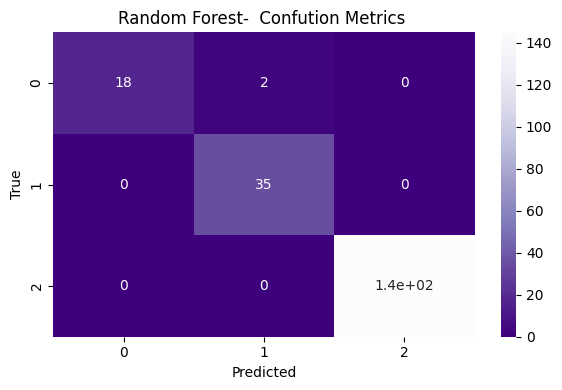


Name: Gradient Boosting
Accuracy: 98.50
Precision Score: 0.9648148148148148
Recall Score: 0.971510673234811
F1 Score: 0.9680954237535943


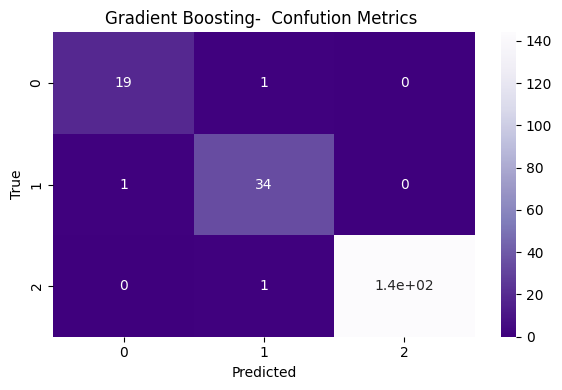


Name: SVM
Accuracy: 84.00
Precision Score: 0.7709777061509535
Recall Score: 0.7677339901477832
F1 Score: 0.7693137108421734


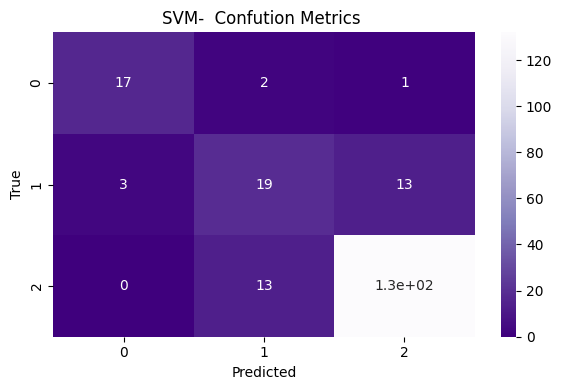


Name: K-Nearest Neighbors
Accuracy: 84.50
Precision Score: 0.7890112366785796
Recall Score: 0.7987684729064041
F1 Score: 0.7936673939453037


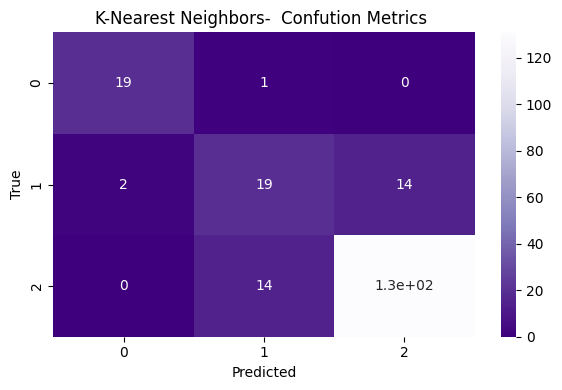


Name: Naive Bayes
Accuracy: 70.50
Precision Score: 0.5350392156862745
Recall Score: 0.604679802955665
F1 Score: 0.5314288745656613


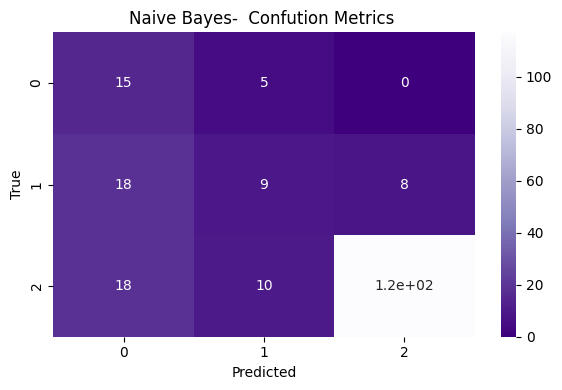


Name: Decision Tree
Accuracy: 98.50
Precision Score: 0.9648148148148148
Recall Score: 0.971510673234811
F1 Score: 0.9680954237535943


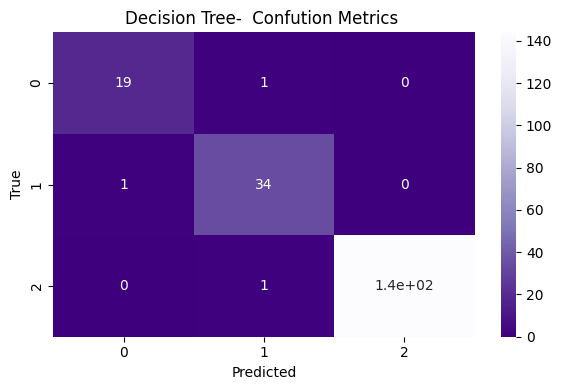


Summary:


,Models,Test Accuracy,Test Precision,Test Recall Score,Test F1 Score
0,Logistic Regression,83.0,0.731522,0.727094,0.728120
1,Random Forest,99.0,0.981982,0.966667,0.973197
2,Gradient Boosting,98.5,0.964815,0.971511,0.968095
3,SVM,84.0,0.770978,0.767734,0.769314
4,K-Nearest Neighbors,84.5,0.789011,0.798768,0.793667
5,Naive Bayes,70.5,0.535039,0.604680,0.531429
6,Decision Tree,98.5,0.964815,0.971511,0.968095


In [ ]:
summary = []
for names, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, preds)*100
    prec = precision_score(y_test, preds, average='macro') #average='macro' -> to treat all the classes equally
    recal = recall_score(y_test, preds, average='macro')
    f1 = f1_score(y_test, preds,  average='macro')
    print(f"\nName: {names}")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision Score: {prec}")
    print(f"Recall Score: {recal}")
    print(f"F1 Score: {f1}")

    plt.figure(figsize=(6, 4))
    cm  = confusion_matrix(y_test,preds)
    sns.heatmap(cm, annot=True, cmap='Purples_r') #Plots the confusion matrix as a heatmap ,annot=True-> shows the numbers in each cell.
    plt.title(f"{names}-  Confution Metrics ")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout() #avoids label overlap
    plt.show()

    summary.append({ # addind dictionary to summary list
        'Models': names,
        'Test Accuracy': acc,
        'Test Precision': prec,
        'Test Recall Score': recal,
        'Test F1 Score': f1

    })
    summary_df = pd.DataFrame(summary) # Converts the summary list of dictionaries into a DataFrame

# Show all model evaluation metrics in one table
print("\nSummary:")
summary_df

**Best Performer: Decision Tree (98% accuracy, highest precision, recall, and F1 score)**

**Top 3 Models: Decision Tree, Random Forest, Gradient Boosting**

**Moderate Performance: Logistic Regression, SVM, KNN**

**Weakest: Naive Bayes as lowest precision and F1 score.**

**from all the above we can say that Tree-based models are most effective for this dataset.**

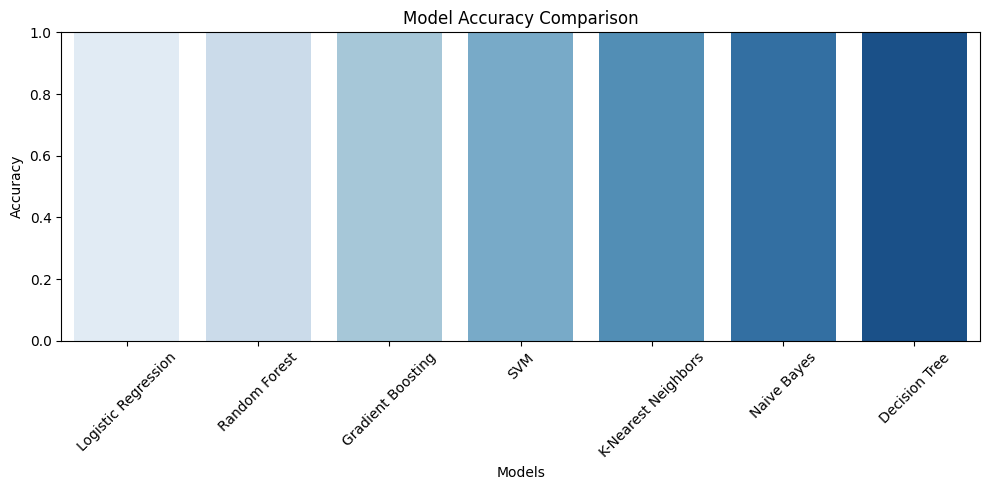

In [ ]:
#bar plot for visual summary of model performance
plt.figure(figsize=(10, 5))
sns.barplot(data=summary_df, x='Models', y='Test Accuracy', palette='Blues')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45) #Rotates the x-axis labels  by 45 degrees to prevent overlapping
plt.ylim(0, 1) #Sets y-axis range from 0 to 1
plt.tight_layout() #avoids label overlap
plt.show()

**Decision Tree and Naive Bayes performed slightly better than the others**.

**Logistic Regression and Random Forest had the lowest**